In [59]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ✅ Load and clean data
df = pd.read_csv('../../data/downloads/ftl/ftl_model_output_20250603_001012.csv')
df = df.drop_duplicates(subset='invoice_id', keep='first')
df = df[df['site'].isin(['SPLA'])]
df = df[df['invoice_commodity_group'].isin(['1CBL'])]
df = df[df['model'].isin([True])]
df = df[(df['freight_per_invoice']>0) & (df['invoice_commodity_quantity']>0)]


In [60]:
df['model'].unique()

array([1.])

In [61]:
df.columns

Index(['invoice_id', 'site', 'new_commodity_group',
       'invoice_commodity_quantity', 'multiple_commodities',
       'priority_multiple_commodities', 'freight_per_invoice', 'invoice_total',
       'invoice_commodity_group', 'invoice_commodity_description', 'location',
       'supplier_name', 'model', 'supplier_mode', 'supplier_match_flag',
       'standardization_status', 'error_summary', 'priority_failure_reasons',
       'method', 'unit', 'rate_unit', 'freight_class', 'applied_rate',
       'shipment_type', 'invoice_freight_commodity_cost', 'base_rate',
       'inflation_rate', 'fsc_rate', 'intertim_rate', 'xgs_rebate',
       'star_net_rebate', 'raw_invoice_cost', 'minimum_applied',
       'freight_class_rank', 'ltl_only_cost', 'ftl_cost', 'ltl_fallback_cost',
       'xgs_threshold_cost', 'xgs_method', 'optimal_cost', 'optimal_method',
       'ftl_blocked', 'penalty_vs_optimal', 'hybrid_overflow_flag',
       'hybrid_num_truckloads', 'hybrid_overflow_qty', 'hybrid_overflow_cost',

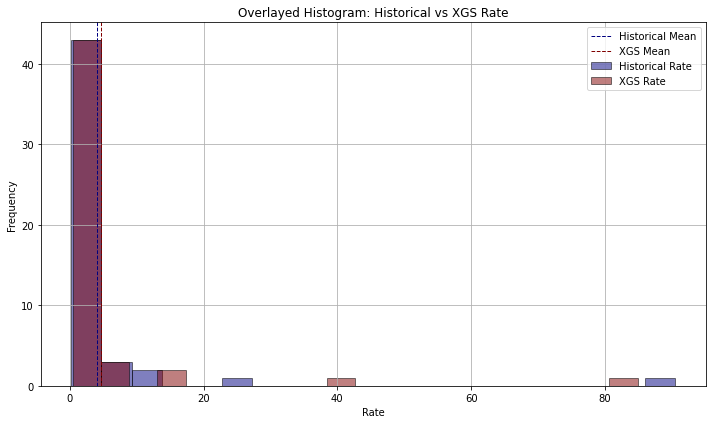

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Drop NaNs from both columns
clean_df = df[['xgs_rate', 'historical_rate']].dropna()

# Plot
plt.figure(figsize=(10, 6))
plt.hist(clean_df['historical_rate'], bins=20, alpha=0.5, label='Historical Rate', color='navy', edgecolor='black')
plt.hist(clean_df['xgs_rate'], bins=20, alpha=0.5, label='XGS Rate', color='maroon', edgecolor='black')

# Add mean lines
plt.axvline(clean_df['historical_rate'].mean(), color='navy', linestyle='--', linewidth=1, label='Historical Mean')
plt.axvline(clean_df['xgs_rate'].mean(), color='maroon', linestyle='--', linewidth=1, label='XGS Mean')

# Labels and legend
plt.xlabel("Rate")
plt.ylabel("Frequency")
plt.title("Overlayed Histogram: Historical vs XGS Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


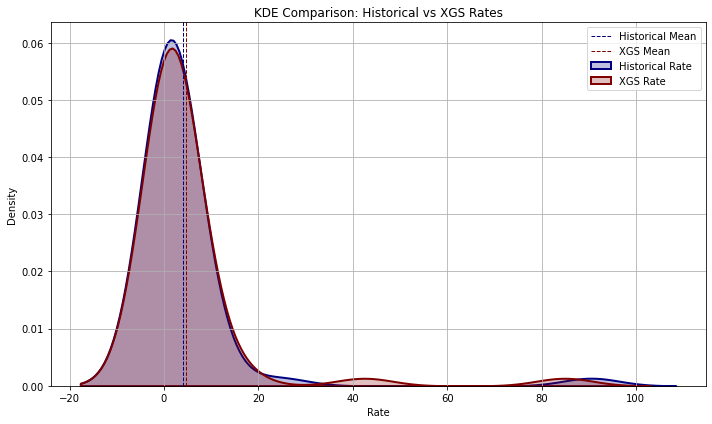

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Drop missing values
clean_df = df[['xgs_rate', 'historical_rate']].dropna()

# Set plot size
plt.figure(figsize=(10, 6))

# KDE for historical_rate
sns.kdeplot(
    data=clean_df, 
    x='historical_rate', 
    fill=True, 
    color='navy', 
    label='Historical Rate', 
    linewidth=2
)

# KDE for xgs_rate
sns.kdeplot(
    data=clean_df, 
    x='xgs_rate', 
    fill=True, 
    color='maroon', 
    label='XGS Rate', 
    linewidth=2
)

# Add vertical lines for means
plt.axvline(clean_df['historical_rate'].mean(), color='navy', linestyle='--', linewidth=1, label='Historical Mean')
plt.axvline(clean_df['xgs_rate'].mean(), color='maroon', linestyle='--', linewidth=1, label='XGS Mean')

# Final touches
plt.title("KDE Comparison: Historical vs XGS Rates")
plt.xlabel("Rate")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


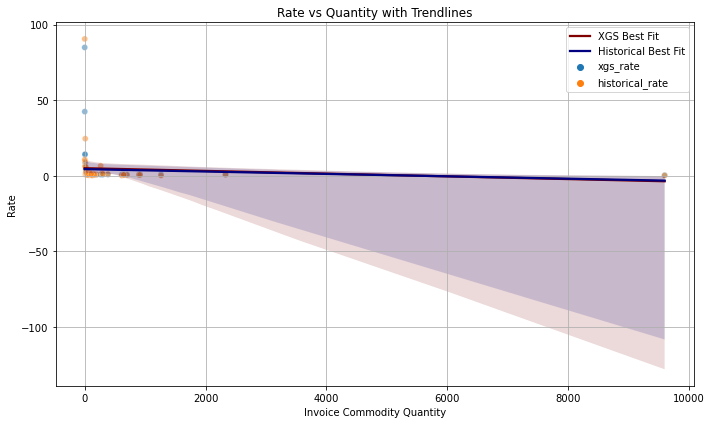

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Clean data
clean_df = df[['invoice_commodity_quantity', 'xgs_rate', 'historical_rate']].dropna()

# Melt the DataFrame to long format for easier plotting
long_df = clean_df.melt(
    id_vars='invoice_commodity_quantity', 
    value_vars=['xgs_rate', 'historical_rate'], 
    var_name='rate_type', 
    value_name='rate'
)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=long_df, 
    x='invoice_commodity_quantity', 
    y='rate', 
    hue='rate_type', 
    alpha=0.5
)
sns.regplot(
    data=long_df[long_df['rate_type'] == 'xgs_rate'],
    x='invoice_commodity_quantity',
    y='rate',
    scatter=False,
    color='maroon',
    label='XGS Best Fit'
)
sns.regplot(
    data=long_df[long_df['rate_type'] == 'historical_rate'],
    x='invoice_commodity_quantity',
    y='rate',
    scatter=False,
    color='navy',
    label='Historical Best Fit'
)

# Formatting
plt.title("Rate vs Quantity with Trendlines")
plt.xlabel("Invoice Commodity Quantity")
plt.ylabel("Rate")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
